# Finger Angle Test Results Analysis

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### What values the angles should take for each pose

In [72]:
pose1_joints = {
    "finger1": [0] * 150,
    "finger2": [0] * 150,
}

pose2_joints = {
    "finger1": [np.degrees(1.35)] * 150,
    "finger2": [np.degrees(1.35)] * 150,
}

pose3_joints = {
    "finger1": [0] * 150,
    "finger2": [0] * 150,
}

pose4_joints = {
    "finger1": [np.degrees(1.35)] * 150,
    "finger2": [0] * 150,
}

pose5_joints = {
    "finger1": [0] * 150,
    "finger2": [0] * 150,
}

pose6_joints = {
    "finger1": [np.degrees(1.35)] * 150,
    "finger2": [np.degrees(1.35)] * 150,
}

pose7_joints = {
    "finger1": [0] * 150,
    "finger2": [np.degrees(1.35)] * 150,
}

In [73]:
angle_order = {
    0: -90,
    1: -60,
    2: -30,
    3: 0,
    4: 30,
    5: 60,
    6: 90,
}

pose_joints = {
    1: pose1_joints,
    2: pose2_joints,
    3: pose3_joints,
    4: pose4_joints,
    5: pose5_joints,
    6: pose6_joints,
    7: pose7_joints,
}

pose_joints_dfs = {key: pd.DataFrame(pose_joints[key]) for key in pose_joints.keys()}

### Read and process each file

In [74]:
num_fingers = 2
pose = 7

pose_files = []
for i in range(-90, 91, 30):
    file_path = f"test_data/{num_fingers}-fingers-pose{pose}-angle{i}.csv"
    pose_files.append(pd.read_csv(file_path))

for i in range(len(pose_files)):
    for col in pose_files[i].columns:
        pose_files[i][col] = np.rad2deg(pose_files[i][col])
        
pose_files[0]

,finger1,finger2
0,9.574306,52.317842
1,9.282037,52.375614
2,8.954850,52.551560
3,8.631903,52.874587
4,8.355031,53.238318
...,...,...
145,7.051624,68.774613
146,7.072489,68.782980
147,7.076287,68.778314
148,7.072464,68.785610


### Mean angle of error for every joint in a given pose/rotation combination

In [75]:
col_means = [pose_files[i] - pose_joints_dfs[pose] for i in range(len(pose_files))]

col_means = [abs(col_means[i].mean(axis=0)) for i in range(len(col_means))]

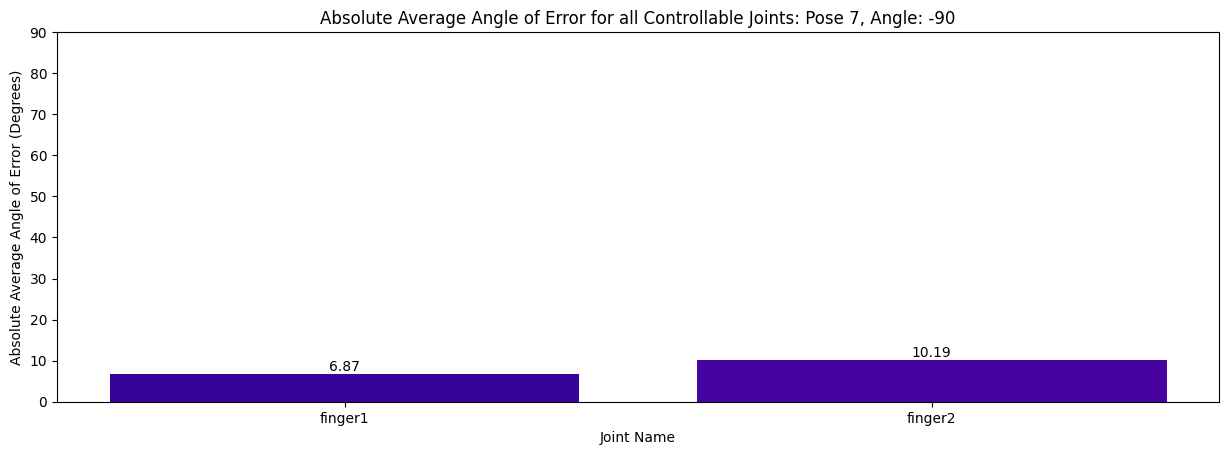

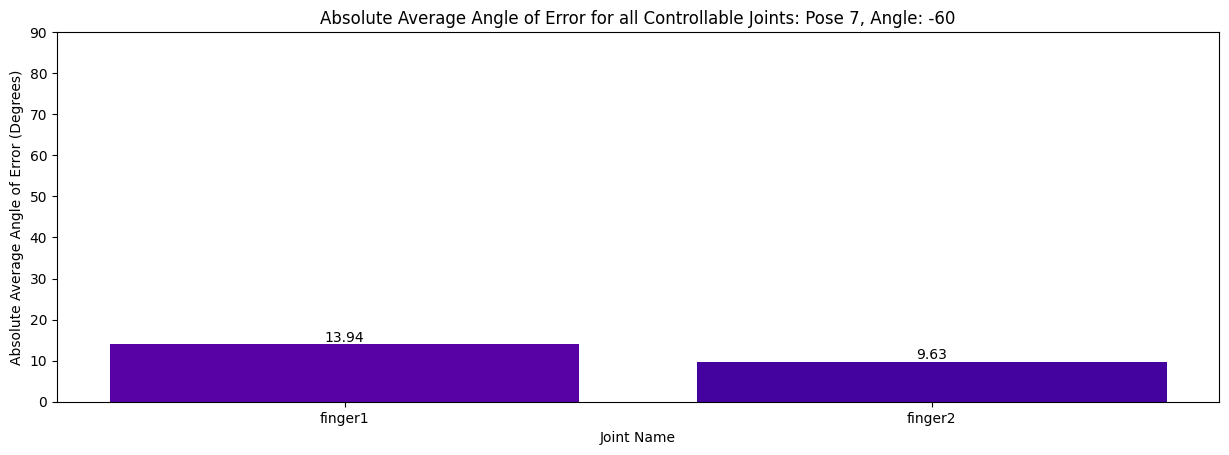

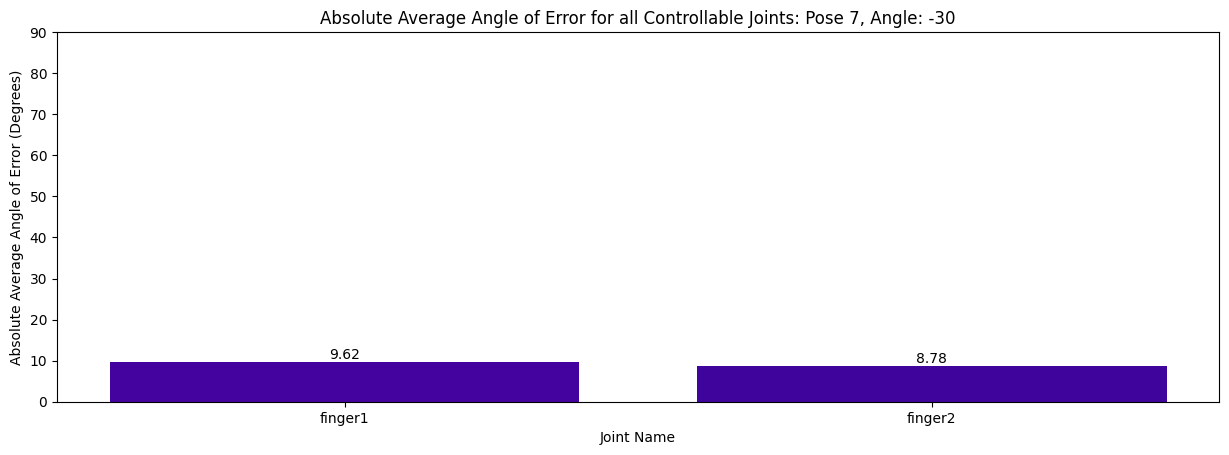

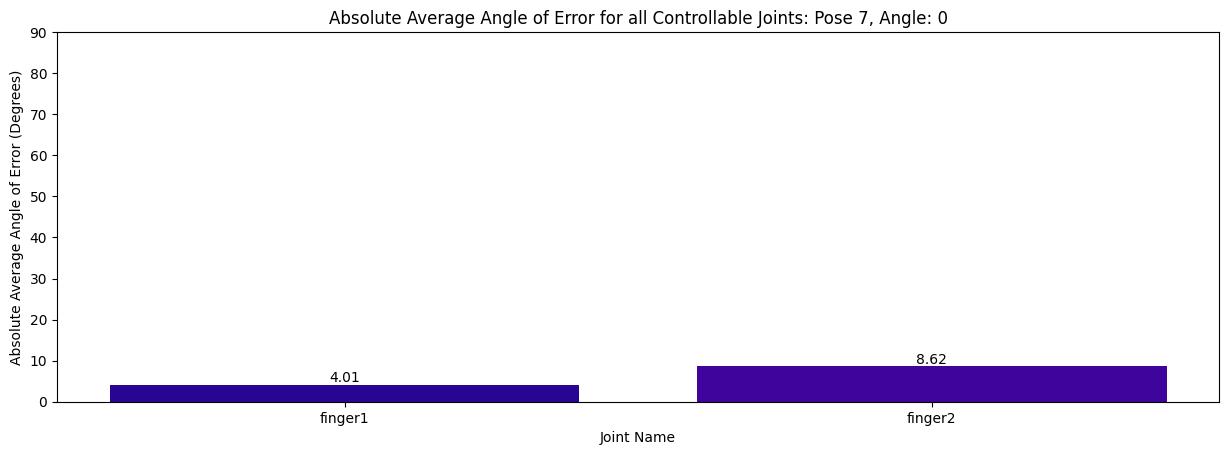

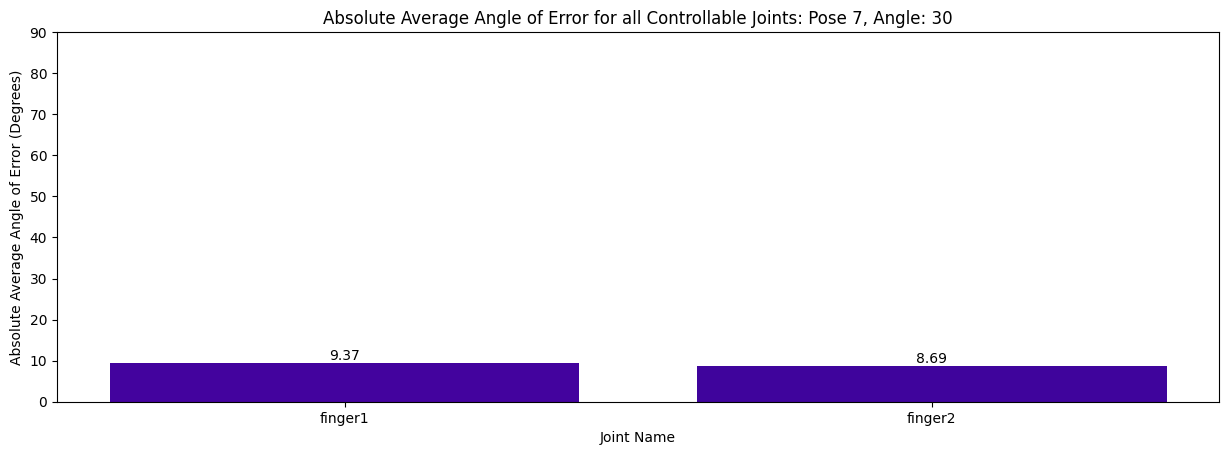

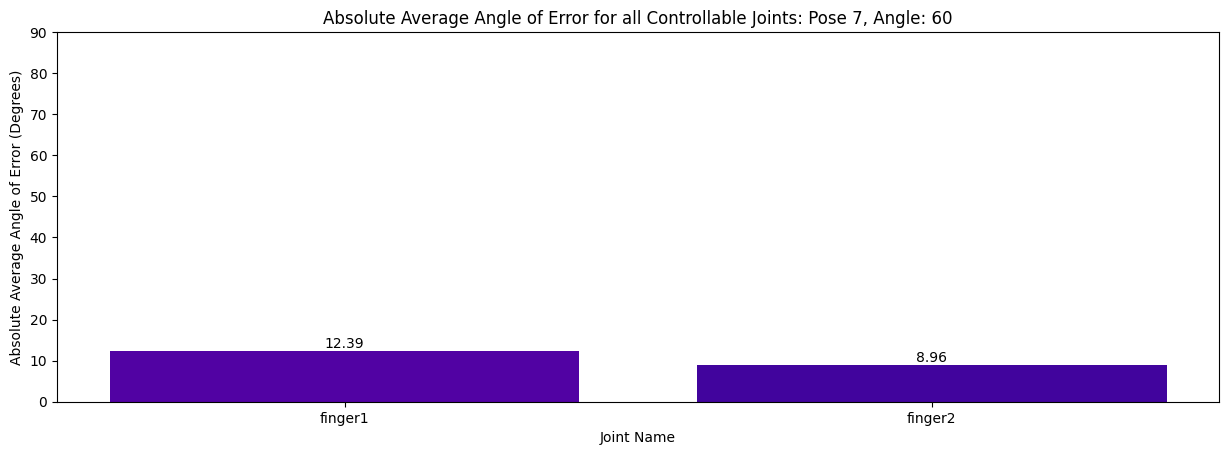

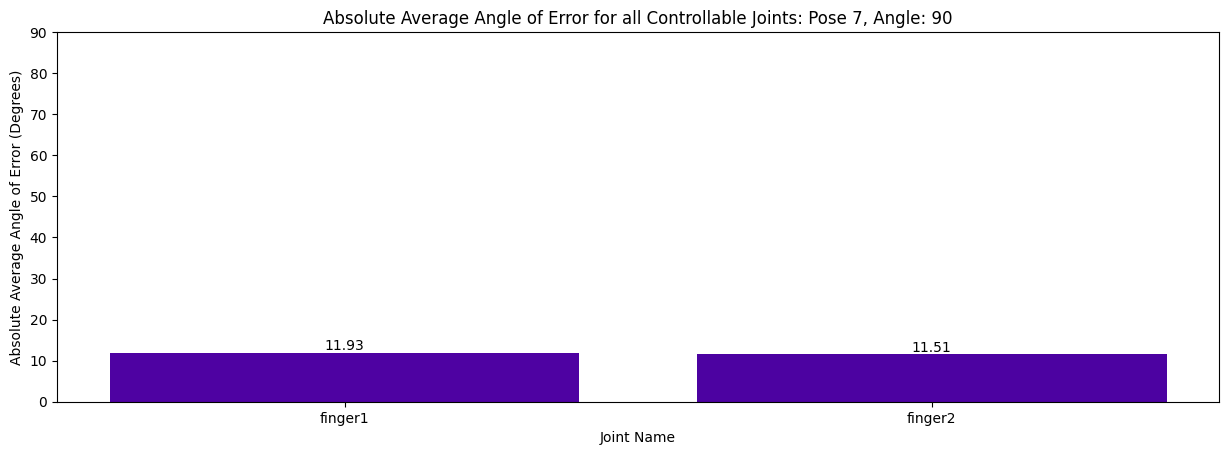

In [76]:
x = [i for i in range(len(col_means[i].keys()))]

my_cmap = plt.get_cmap('plasma')
# rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
rescale = lambda y: y / 90

for i, means in enumerate(col_means):

    plt.figure().set_figwidth(15)
    mean_bar = plt.bar(x=x, height=means.values, color=my_cmap(rescale(means.values)))
    plt.bar_label(mean_bar, fmt="%0.2f")
    plt.xlabel("Joint Name")
    plt.ylabel("Absolute Average Angle of Error (Degrees)")
    plt.ylim(0, 90)
    plt.title(f"Absolute Average Angle of Error for all Controllable Joints: Pose {pose}, Angle: {angle_order[i]}")
    plt.xticks(x, means.keys())
    plt.show()

### Mean angle of error for every rotation in a given pose/joint combination

In [77]:
joint_errors_per_angle = {key: [col_means[i][key] for i in range(len(col_means))] for key in pose_joints[pose].keys()}

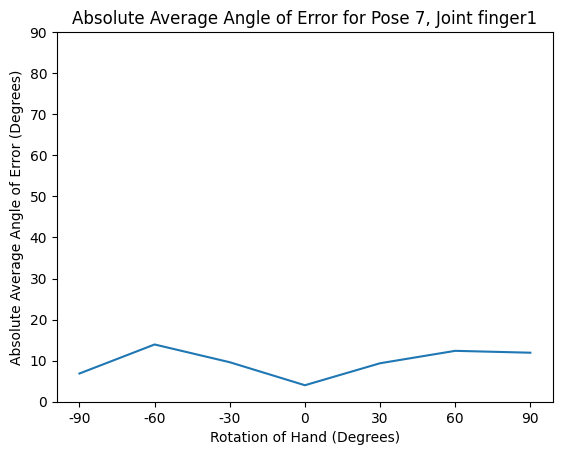

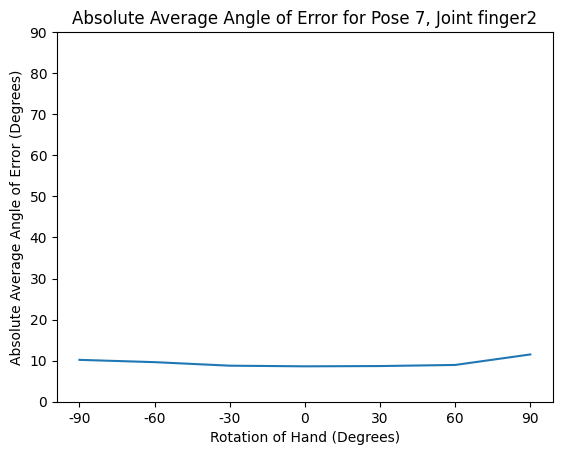

In [78]:
x = np.array([i for i in range(len(pose_files))])

for joint, errors in joint_errors_per_angle.items():
    plt.plot(errors)
    plt.xlabel("Rotation of Hand (Degrees)")
    plt.ylabel("Absolute Average Angle of Error (Degrees)")
    plt.ylim(0, 90)
    plt.title(f"Absolute Average Angle of Error for Pose {pose}, Joint {joint}")
    plt.xticks(x, -90 + x * 30)
    plt.show()

### Distribution of every joint's absolute angle error in a given pose/rotation combination

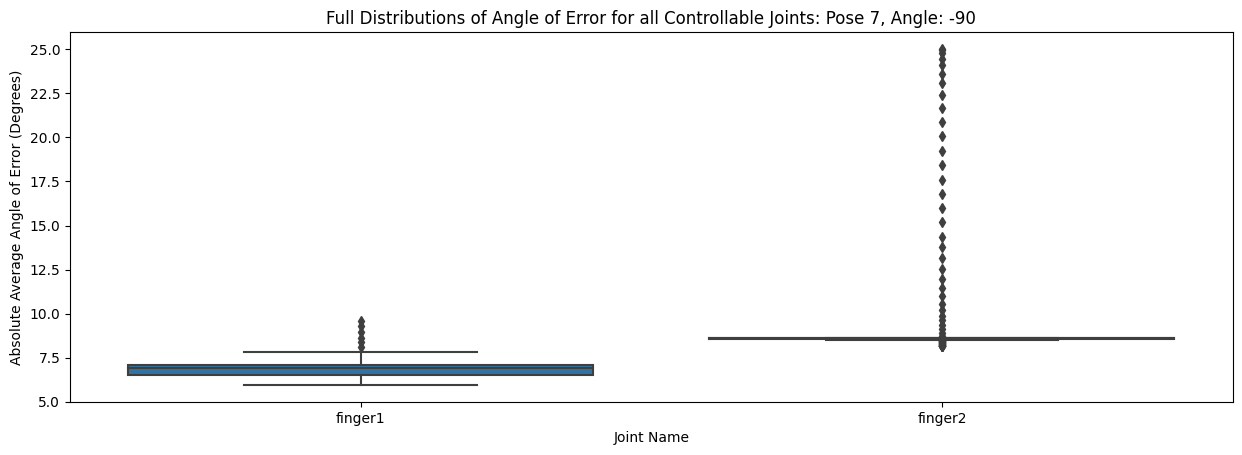

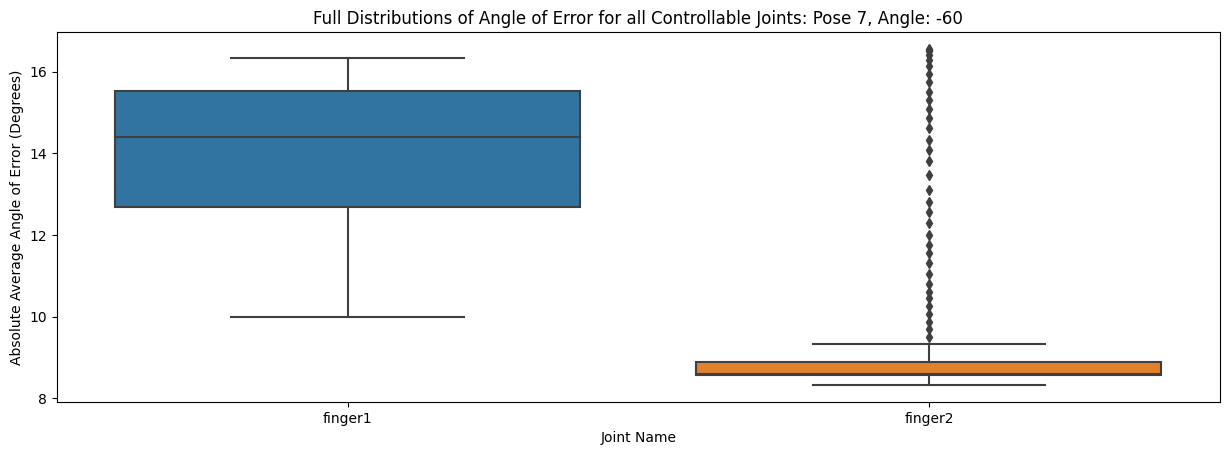

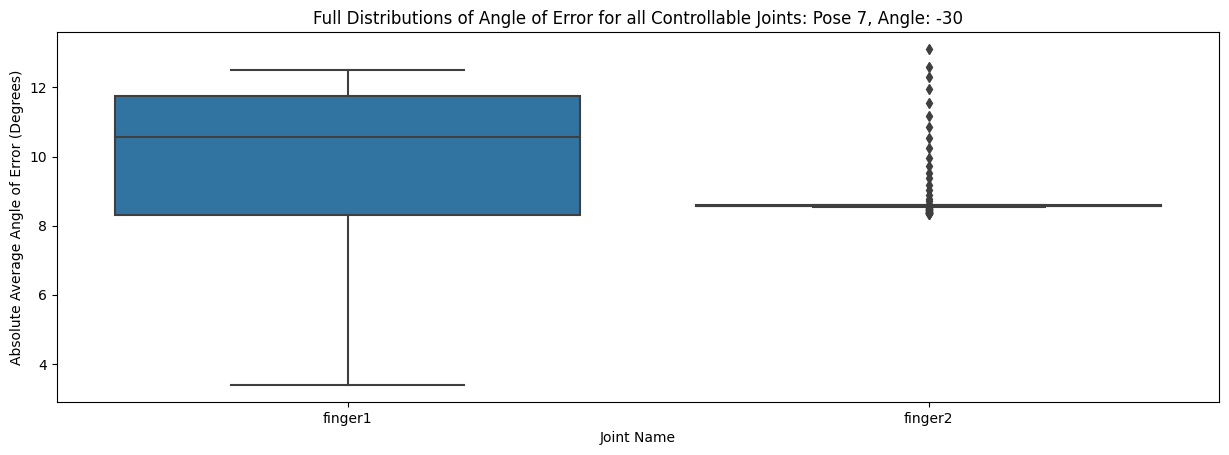

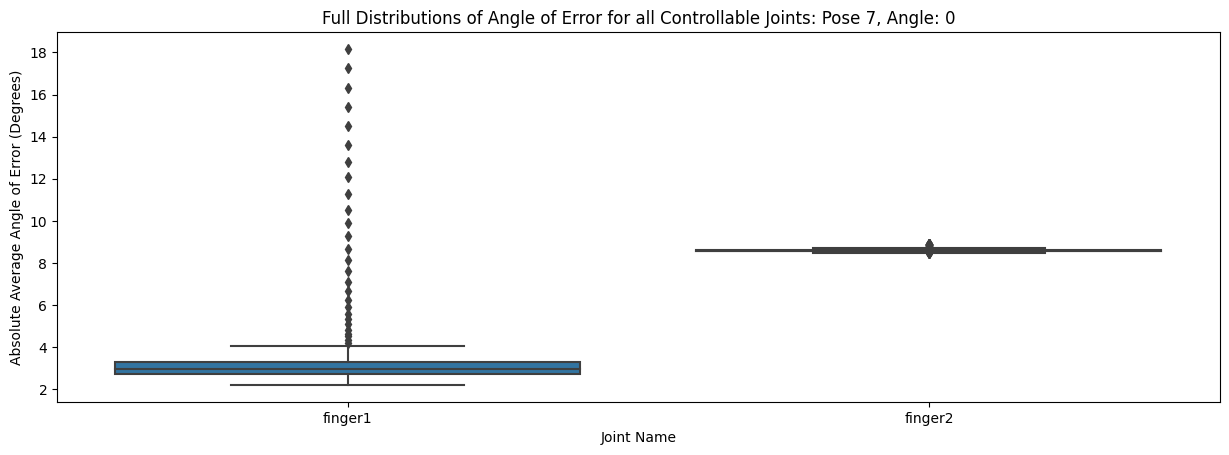

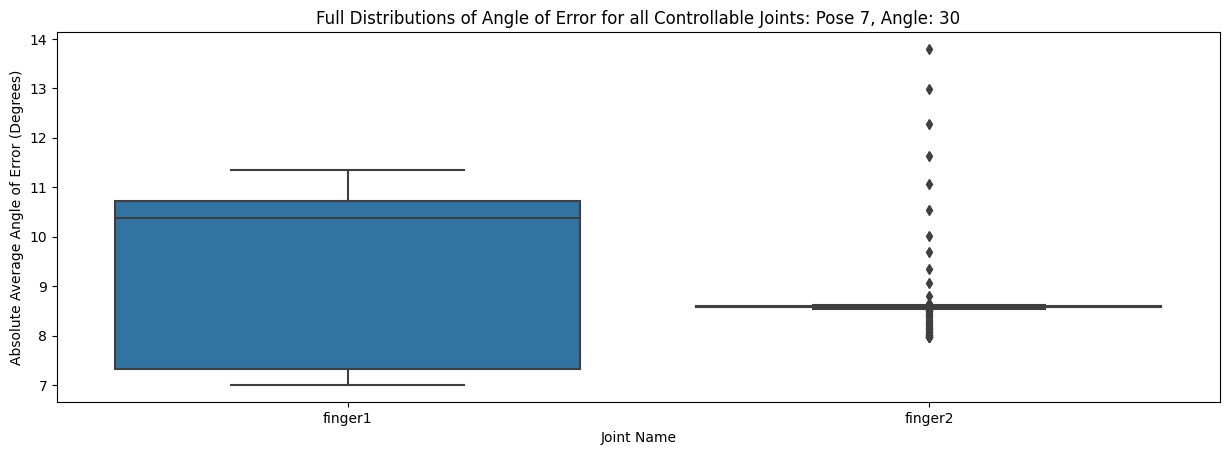

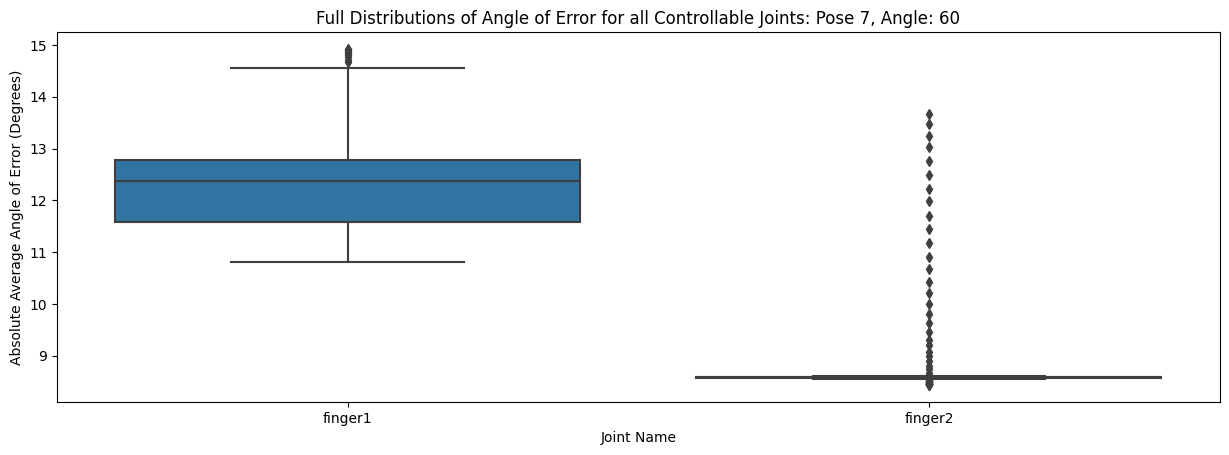

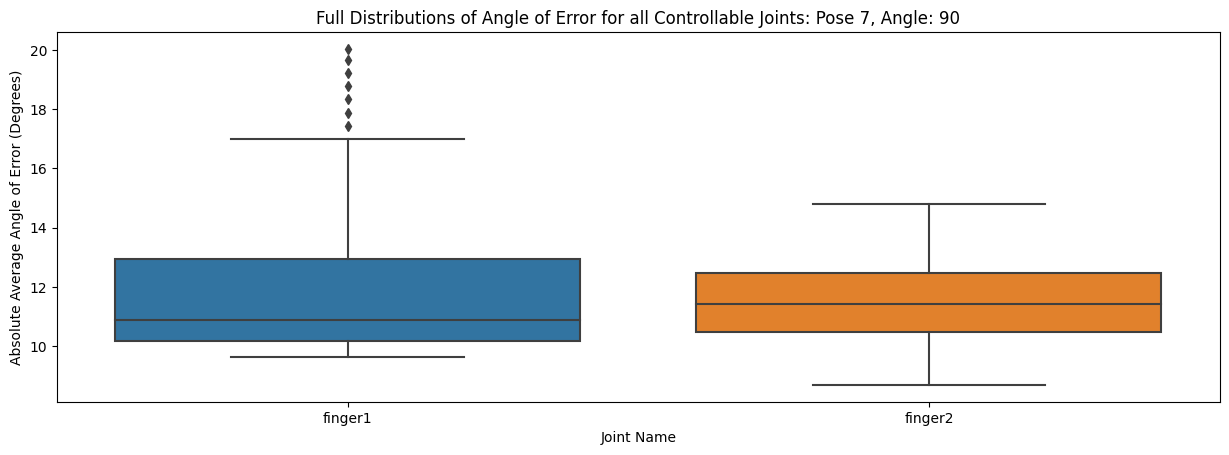

In [79]:
for i in range(len(pose_files)):
    plt.figure().set_figwidth(15)
    # sns.boxplot(abs(pose_files[i]))
    sns.boxplot(abs(pose_files[i] - pose_joints_dfs[pose]))
    plt.xlabel("Joint Name")
    plt.ylabel("Absolute Average Angle of Error (Degrees)")
    plt.title(f"Full Distributions of Angle of Error for all Controllable Joints: Pose {pose}, Angle: {angle_order[i]}")
    plt.show()

In [80]:
# col_ranges = [pose_files[i].max() - pose_files[i].min() for i in range(len(pose_files))]

# x = [i for i in range(len(col_ranges[i].keys()))]

# my_cmap = plt.get_cmap('plasma')
# # rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
# rescale = lambda y: y / 90

# for i, ranges in enumerate(col_ranges):

#     plt.figure().set_figwidth(15)
#     range_bar = plt.bar(x=x, height=ranges.values, color=my_cmap(rescale(ranges.values)))
#     plt.bar_label(range_bar, fmt="%0.2f")
#     plt.xlabel("Joint Name")
#     plt.ylabel("Range of Joints (Degrees)")
#     plt.ylim(0, 90)
#     plt.title(f"Range of Joints Throughout the Experiment: Pose 1, Angle: {angle_order[i]}")
#     plt.xticks(x, ranges.keys())
#     plt.show()